## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image
from src.optimization.optimizers import NormalizedOptimizer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device=device)

In [4]:
img_size = 224
size = (3, img_size, img_size)

robustness_transforms = [
    tfs.GaussianBlur(7, 2),
]
transforms = [ClampingMinMax(0, 1)]
parametrization_transforms = [NormalizationMeanStd()]
denormalization_transforms = [DenormalizationMeanStd()]
gradient_transforms = [tfs.GaussianBlur(7, 2)]
to_tensor = tfs.Compose([tfs.Resize(size=(img_size, img_size)),tfs.ToTensor()])


In [5]:
loss_agg_fn = AggregationFn(metric="similarity").to(device)

In [6]:
def vis(ptypes, input_tensor, lr_scheduler_cls=None, lr_scheduler_kwargs={}):
    image = visualize_prototypes(model, 
                             ptypes,
                            optimization_steps=200, 
                            input_tensor=input_tensor.clone(),
                            transforms=transforms, 
                            robustness_transforms=robustness_transforms,
                            parametrization_transforms=parametrization_transforms,
                            denormalization_transforms=denormalization_transforms,
                            gradient_transforms=gradient_transforms,
                            optimizer_kwargs={"lr": 0.02},
                            lr_scheduler_cls=lr_scheduler_cls,
                            lr_scheduler_kwargs=lr_scheduler_kwargs,
                            lr_scheduler_step_interval=10,
                            print_interval=10,
                            display_interval=10)
    pilimg = tfs.ToPILImage()(image)
    display(pilimg)

## Without lr scheduler

step: 0/200, loss: 5.270331382751465


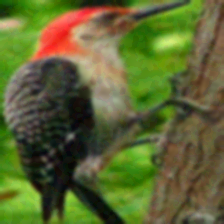

step: 10/200, loss: 0.27751192450523376


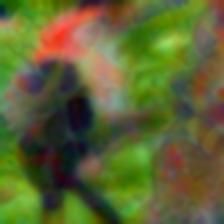

step: 20/200, loss: 0.20080038905143738


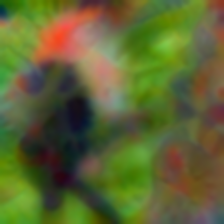

step: 30/200, loss: 0.0861990824341774


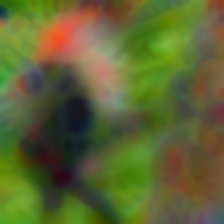

step: 40/200, loss: 0.08171456307172775


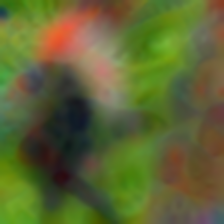

step: 50/200, loss: 0.08098244667053223


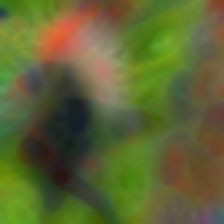

step: 60/200, loss: 0.0528368279337883


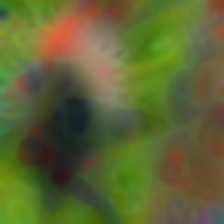

step: 70/200, loss: 0.10022875666618347


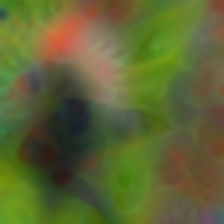

step: 80/200, loss: 0.059247080236673355


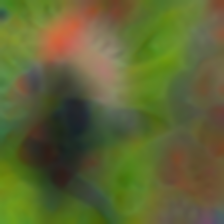

step: 90/200, loss: 0.06529361009597778


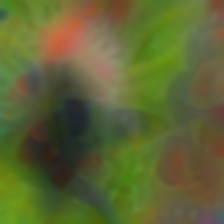

step: 100/200, loss: 0.05153422802686691


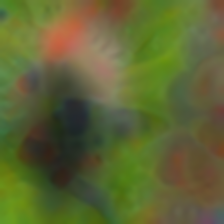

step: 110/200, loss: 0.14508214592933655


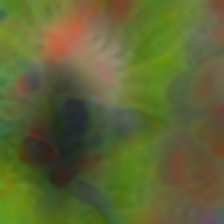

step: 120/200, loss: 0.15727701783180237


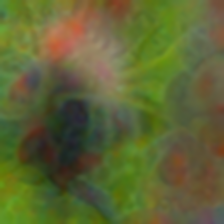

step: 130/200, loss: 0.09086952358484268


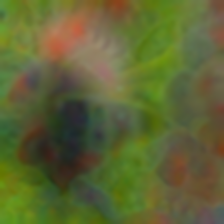

step: 140/200, loss: 0.15754950046539307


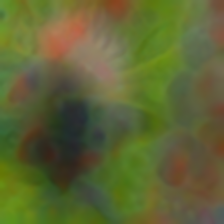

step: 150/200, loss: 0.12214630842208862


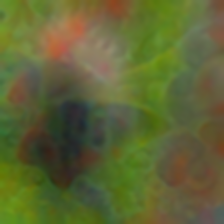

step: 160/200, loss: 0.054835423827171326


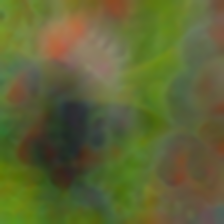

step: 170/200, loss: 0.04809757322072983


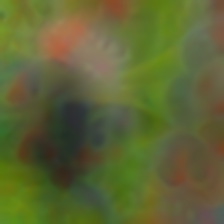

step: 180/200, loss: 0.03902420029044151


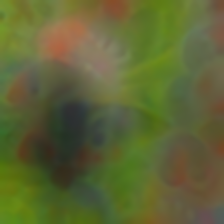

step: 190/200, loss: 0.1391610950231552


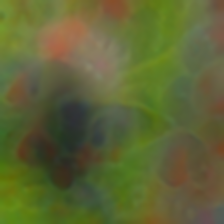

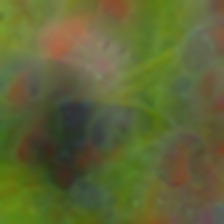

In [7]:
input_image = torch.randn(size)

image = Image.open("data/train_cropped/189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg")
input_image = to_tensor(image)
vis([(188,1)],input_image) # red head

## With lr scheduler
### Increasing and then decreasing lr

In [8]:
from torch.optim.lr_scheduler import MultiplicativeLR, SequentialLR
lr_scheduler_cls = MultiplicativeLR
lr_scheduler_kwargs = {"lr_lambda": lambda itr: 1.2 if itr < 10 else 0.95}

step: 0/200, loss: 5.270331382751465, lr: 0.02


/home/z1134376/miniconda3/envs/StyleFlow/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:325: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


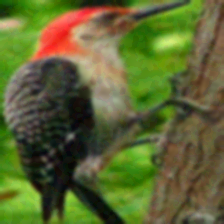

step: 10/200, loss: 0.23419377207756042, lr: 0.0288


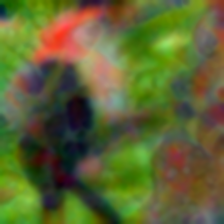

step: 20/200, loss: 0.12975607812404633, lr: 0.03456


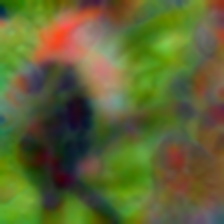

step: 30/200, loss: 0.0815255343914032, lr: 0.041472


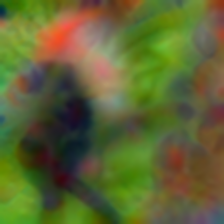

step: 40/200, loss: 0.1256430596113205, lr: 0.0497664


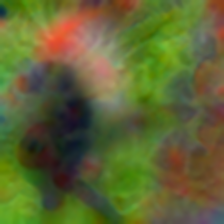

step: 50/200, loss: 0.10459714382886887, lr: 0.05971968


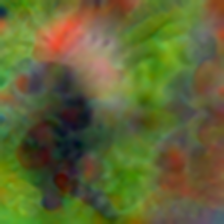

step: 60/200, loss: 0.059218745678663254, lr: 0.071663616


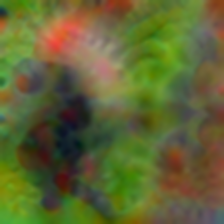

step: 70/200, loss: 0.12449397891759872, lr: 0.0859963392


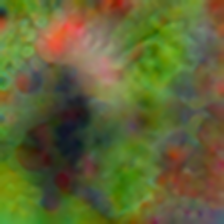

step: 80/200, loss: 0.12594108283519745, lr: 0.10319560703999998


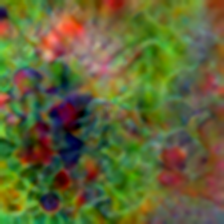

step: 90/200, loss: 0.0916137844324112, lr: 0.12383472844799998


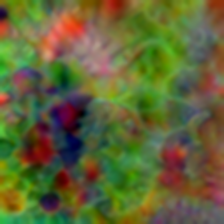

step: 100/200, loss: 0.13902688026428223, lr: 0.09313403535359997


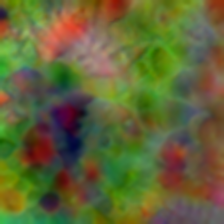

step: 110/200, loss: 0.15921644866466522, lr: 0.08847733358591997


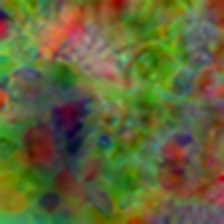

step: 120/200, loss: 0.06949631869792938, lr: 0.08405346690662396


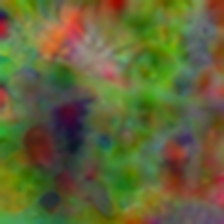

step: 130/200, loss: 0.04485461860895157, lr: 0.07985079356129277


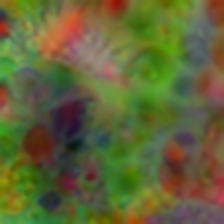

step: 140/200, loss: 0.10792480409145355, lr: 0.07585825388322813


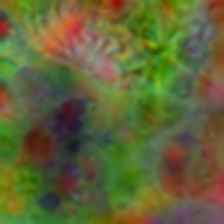

step: 150/200, loss: 0.13478712737560272, lr: 0.07206534118906673


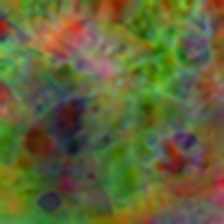

step: 160/200, loss: 0.05829605460166931, lr: 0.06846207412961339


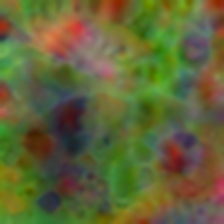

step: 170/200, loss: 0.061245981603860855, lr: 0.06503897042313271


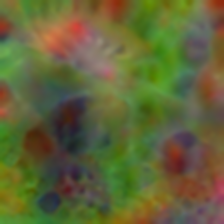

step: 180/200, loss: 0.09614003449678421, lr: 0.061787021901976075


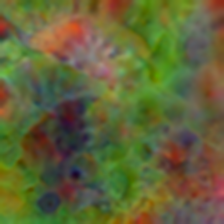

step: 190/200, loss: 0.09412244707345963, lr: 0.05869767080687727


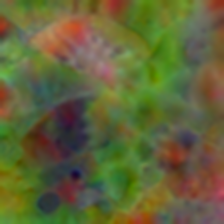

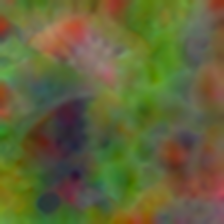

In [9]:
vis([(188,1)],input_image,lr_scheduler_cls, lr_scheduler_kwargs) # black-white feathers